<a href="https://colab.research.google.com/github/klmartinez/DSF/blob/main/activities/OverviewMLAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSF Fall 2022 

### Challenge: Regression Linear Model

Posted: 11/15/2022

Originally created by **Carlos Lizarraga**, edited by Kiana Lee Martinez.

We used the [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear_model) model (same as the Ordinary Least Squares Method Linear Fit), to fit a linear modelto the diabetes dataset inclyded in the Scikit-Learn Library.

There is a large collection of different types of Regression Algorithms included in the [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html?highlight=linear_model#module-sklearn.linear_model). 

We are now interested in comparing the standard LinearRegression Algorithm with the following set of [Robust Regressors](https://en.wikipedia.org/wiki/Robust_regression):
* [HubberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)
* [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)
* [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor)

Robust Regressors perform better when data outliers are present. 

Please run the additional set of Robust Regression Algorithms and perform a comparison between the [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for each case. 

Comment on the results of your observations. 

Once you accomplish this task, please save a copy of your Jupyter Notebook in your Github DSF Weekly Journals. 


## An Overview of Machine Learning Algorithms

Created: 11/15/2022

We will use Python's Machine Learning  [Scikit-Learn Library](https://scikit-learn.org/stable/index.html), in particular the [LinearRegression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression). 

In [139]:
# importing needed packages
import matplotlib.pylab as plt
import numpy as np
import pandas as pd # import pandas

from sklearn.linear_model import LinearRegression # import LinearRegression
from sklearn.linear_model import HuberRegressor # import HuberRegressor
from sklearn.linear_model import RANSACRegressor # import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor # import TheilSenRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import datasets

# '%matplotlib' is a line-oriented "magic function" in Python
# '%matplotlib inline' sets the backend of the matplotlib to the 'inline' backend; i.e. it renders the figure in the notebook instead of displaying a dump of the figure object
%matplotlib inline


### Diabetes Dataset

We will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) included in Scikit-Learn.

In [137]:
diabetes=datasets.load_diabetes() # Load dataset
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes.data.shape # feature matrix shape

(442, 10)

In [6]:
diabetes.target.shape # target vector shape

(442,)

In [7]:
diabetes.feature_names # column names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Linear Regression Model

Linear Regression assumes the following model:

$y = Xβ + c + ϵ$

where: 

$X$ is the data, $β$ are the coefficients, 
$c$ is the intercept, $ϵ$ is an error that cannot be explained by model, $y$ is the target. 

Using scikit-learn, linear regression is very easy:

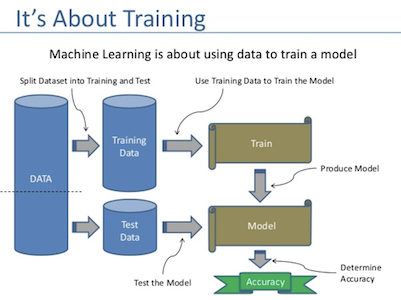

In [120]:
# Seperate train and test data (4 groups)
# Will set 20% of the data for testing the model, and a random_state is set for reproducibility. 
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=0)

# There are three steps to model something with sklearn

# 1. Set up the model
model = LinearRegression()

# 2. Then train the model using fit 
model.fit(X_train, y_train)

# 3. Check the performance score with unseen test data
model.score(X_test, y_test)


0.33222203269065176

You can extract model information:

In [26]:
model.coef_ # Get the coefficients, beta (slopes)

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [27]:
model.intercept_ # Get the intercept, c

152.5381335195406

In [28]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [29]:
model.predict(X_test) # Predict unkown data

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86


We can plot the prediction y_pred versus original y_test

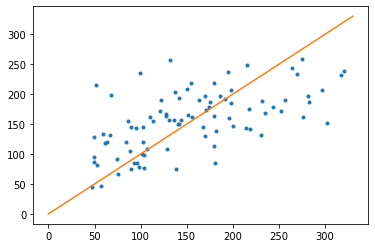

In [30]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfect prediction would all fall on this line
# np.linspace is a linear array of 100 values between 0 and 330
x = np.linspace(0, 330, 100) 
y = x
plt.plot(x, y)
plt.show()



We now extract some known [Linear Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) information. 



In [31]:
# The coefficients
print("Coefficients: \n", model.coef_)

# Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred))

# The mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))

# Mean Absolute Percent Error
print("Mean Absolute Percent Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
Mean Absolute Error (MAE): 46.17
Mean Squared Error: 3424.32
Mean Absolute Percent Error: 0.38
Coefficient of determination: 0.33


## Ridge Regression Model

We will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) included in Scikit-Learn.

We will also be using [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor).

A ridge regression model is used to analyze any data that suffers from [multicollinearity](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) (where several independent variables in a model are correlated). When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. Ridge regression is going to minimize the sum of squared errors and sum of the squared coefficients by adding a penalty function. It is also robust to outliers. 

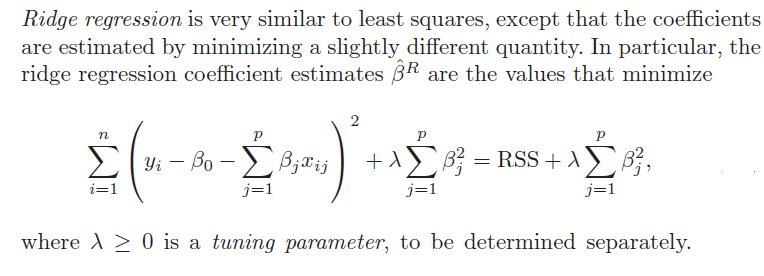

We have already sepearted out training and test data (4 groups) durign the Linear Regression, so we will jump forward to setting up the model. 

In [45]:
# There are three steps to model something with sklearn

# 1. Set up the model
model_ridge = HuberRegressor(max_iter=150)

# 2. Then train the model using fit 
model_ridge.fit(X_train, y_train)

# 3. Check the performance score with unseen test data
model_ridge.score(X_test, y_test)

0.31374950771821253

You can extract model information:

In [46]:
model_ridge.coef_ # Get the coefficients, beta (slopes)

array([ -63.40075069, -312.12158533,  574.78250325,  328.43833872,
       -381.83933224,   94.85730046, -120.83673881,  112.90456316,
        653.7904682 ,   31.16355687])

In [47]:
model_ridge.intercept_ # Get the intercept, c

152.2593312406598

In [48]:
model_ridge.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 150,
 'tol': 1e-05,
 'warm_start': False}

In [49]:
model_ridge.predict(X_test) # Predict unkown data

array([236.04969041, 255.80954621, 160.35206752, 122.67007391,
       191.33513659, 265.28826066, 114.99314269, 184.78189553,
       156.83742622, 242.07463434, 176.08442061, 172.36871422,
       104.49384077,  94.48526091, 237.75074921,  87.11564256,
       160.76014544,  68.48970819, 108.53899409, 219.48792116,
       197.48895558, 162.61331211, 158.27068529, 160.84905796,
       196.6232814 , 169.23770335, 119.3414521 ,  84.36800638,
       192.9117371 , 155.33309125, 171.28497076,  87.16575318,
       150.91633897, 149.64517773, 141.23235981, 198.80536802,
       168.56217795, 185.27526776, 130.78800527, 209.40555228,
        85.41027165, 161.14552119, 144.76334958, 185.86287773,
       172.93546513,  74.22474232, 142.41157478, 142.76553438,
       115.03986859, 240.19582853, 158.72827748,  73.03816515,
       160.70154815, 149.78008838, 244.16586396, 171.19969818,
       192.47681623, 123.4016989 , 130.57900334, 165.81707314,
       219.3019305 , 174.39900736, 158.22131007, 103.56

We can plot the prediction y_pred_ridge versus original y_test

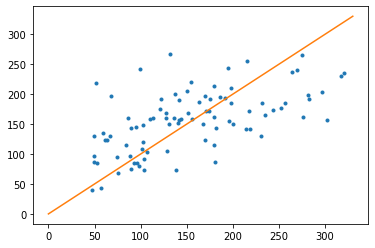

In [51]:
# plot prediction and actual data
y_pred_ridge = model_ridge.predict(X_test) 
plt.plot(y_test, y_pred_ridge, '.')

# plot a line, a perfect prediction would all fall on this line
# np.linspace is a linear array of 100 values between 0 and 330
x = np.linspace(0, 330, 100) 
y = x
plt.plot(x, y)
plt.show()

We now extract some known [Linear Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) information.

In [52]:
# The coefficients
print("Coefficients: \n", model_ridge.coef_)

# Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred_ridge))

# The mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred_ridge))

# Mean Absolute Percent Error
print("Mean Absolute Percent Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred_ridge))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_ridge))

Coefficients: 
 [ -63.40075069 -312.12158533  574.78250325  328.43833872 -381.83933224
   94.85730046 -120.83673881  112.90456316  653.7904682    31.16355687]
Mean Absolute Error (MAE): 46.95
Mean Squared Error: 3519.04
Mean Absolute Percent Error: 0.39
Coefficient of determination: 0.31


## RANSAC Model

We will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) included in Scikit-Learn.

We will also be using [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor).

The randome sample consensus, or RANSAC, algorithm is an iterative method for estimating a mathematical model from a data set that contains outliers. The RANSAC algorithm works by identifying the outliers in a data set and estimating the desired model using data that does not contain outliers.  

RANSAC is accomplished with the following steps:
1. Randomly selecting a subset of the data set
2. Fitting a model to the selected subset
3. Determining the number of outliers
4. Repeating steps 1-3 for a prescribed number of iterations

Example of Linear regressor vs RANSAC regressor:
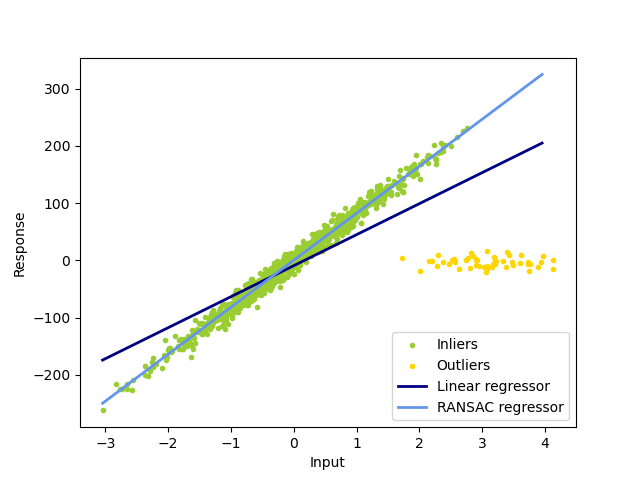

We have already sepearted out training and test data (4 groups) durign the Linear Regression, so we will jump forward to setting up the model. 

In [138]:
# There are three steps to model something with sklearn

# 1. Set up the model
model_ransac = RANSACRegressor()

# 2. Then train the model using fit 
model_ransac.fit(X_train, y_train)

# 3. Check the performance score with unseen test data
model_ransac.score(X_test, y_test)

0.13515259059998186

You can extract model information:

In [140]:
# this model doesn't have coefficeint function under attributes
# model_ransac.coef_ # Get the coefficients, beta (slopes)
model_ransac.estimator_.coef_


array([  -47.44165612,  -512.57598006,   769.26908083,   105.74364837,
       -1561.92253133,  1286.48805758,    60.89513324,   138.48824652,
        1123.49637361,  -346.11904649])

In [141]:
# this model doesn't have intercept function under attributes
# model_ransac.intercept_ # Get the intercept, c
model_ransac.estimator_.intercept_

145.72583002625288

In [128]:
model_ransac.get_params()

{'base_estimator': None,
 'is_data_valid': None,
 'is_model_valid': None,
 'loss': 'absolute_error',
 'max_skips': inf,
 'max_trials': 100,
 'min_samples': None,
 'random_state': None,
 'residual_threshold': None,
 'stop_n_inliers': inf,
 'stop_probability': 0.99,
 'stop_score': inf}

In [129]:
model_ransac.predict(X_test) # Predict unkown data

array([203.20224684, 270.95787287, 146.66297437, 129.90491245,
       180.97609529, 277.55053577, 103.72609519, 164.02243507,
       150.50861023, 268.94205246, 235.09354657, 121.4706383 ,
       105.34190886, 112.46862883, 179.17480474, 109.36629455,
       266.30880383,  35.33299458, 217.67108728, 220.91279208,
       242.66684077, 170.07860936, 156.87965013, 131.78017636,
       201.45570226, 156.89781869,  85.07015383,  75.43309899,
       202.4441437 , 130.58436183, 159.09829784,  94.39334263,
       206.10704753, 208.86522304, 111.03778464, 208.55402645,
       206.18591776, 178.9525889 , 118.00791976, 215.84231973,
       101.78261969, 210.75608097, 132.75319016, 193.84525146,
       145.03364328,  32.15314697, 113.50954297, 146.27863827,
       121.47647764, 284.27267981, 166.19449882,  89.20364463,
       165.63921214, 128.18896125, 276.2734138 , 194.83709987,
       190.76203696, 148.62126067,  79.49710544, 148.46556725,
       255.90660309, 177.03854456,  99.67295636,  89.49

We can plot the prediction y_pred_ridge versus original y_test

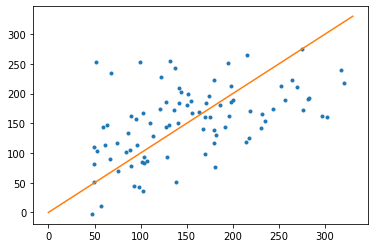

In [142]:
# plot prediction and actual data
y_pred_ransac = model_ransac.predict(X_test) 
plt.plot(y_test, y_pred_ransac, '.')

# plot a line, a perfect prediction would all fall on this line
# np.linspace is a linear array of 100 values between 0 and 330
x = np.linspace(0, 330, 100) 
y = x
plt.plot(x, y)
plt.show()

We now extract some known [Linear Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) information.

In [144]:
# The coefficients
print("Coefficients: \n", model_ransac.estimator_.coef_)

# Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred_ransac))

# The mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred_ransac))

# Mean Absolute Percent Error
print("Mean Absolute Percent Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred_ransac))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_ransac))

Coefficients: 
 [  -47.44165612  -512.57598006   769.26908083   105.74364837
 -1561.92253133  1286.48805758    60.89513324   138.48824652
  1123.49637361  -346.11904649]
Mean Absolute Error (MAE): 53.72
Mean Squared Error: 4434.87
Mean Absolute Percent Error: 0.45
Coefficient of determination: 0.14


## "Robust" Multivariate Regression Model

We will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) included in Scikit-Learn.

We will also be using [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor).

The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.

We have already sepearted out training and test data (4 groups) during the Linear Regression, so we will jump forward to setting up the model. 

In [151]:
# There are three steps to model something with sklearn

# 1. Set up the model
model_theil = TheilSenRegressor()

# 2. Then train the model using fit 
model_theil.fit(X_train, y_train)

# 3. Check the performance score with unseen test data
model_theil.score(X_test, y_test)

0.3118753145415196

You can extract model information:

In [153]:
# this model doesn't have coefficeint function under attributes
# model_ransac.coef_ # Get the coefficients, beta (slopes)
model_theil.coef_


array([  18.59510574, -265.06683712,  564.85324951,  250.94319822,
        120.13142816, -362.69441613, -252.65080346,  204.54109282,
        505.55635601,   18.07825705])

In [155]:
# this model doesn't have intercept function under attributes
# model_ransac.intercept_ # Get the intercept, c
model_theil.intercept_

150.4139824702427

In [156]:
model_theil.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'max_iter': 300,
 'max_subpopulation': 10000,
 'n_jobs': None,
 'n_subsamples': None,
 'random_state': None,
 'tol': 0.001,
 'verbose': False}

In [157]:
model_theil.predict(X_test) # Predict unkown data

array([227.88185885, 251.72007571, 156.33862798, 118.79939028,
       177.40545919, 260.12991458, 111.2448668 , 184.43130988,
       147.82273977, 237.6952935 , 173.93015804, 176.46412524,
       105.23459894,  93.2410037 , 238.19646638,  79.35625178,
       143.52875588,  69.37581494,  91.04839347, 208.86694815,
       182.16258075, 159.31640327, 156.88776143, 154.99002935,
       199.73696536, 168.47430896, 112.67922356,  82.9275305 ,
       185.85470377, 155.7168771 , 166.63212701,  83.79372311,
       137.34660159, 139.74405761, 143.6522137 , 191.46413593,
       162.08536293, 184.78199055, 123.92438917, 202.44297094,
        84.33332233, 153.11756348, 147.66088915, 185.57960906,
       170.71882549,  78.49071145, 141.30344959, 131.53535179,
       115.14182384, 222.74672379, 156.29576174,  68.88366391,
       145.78674342, 156.1754649 , 231.67023771, 167.25436539,
       189.8847132 , 113.70150732, 132.46762255, 166.26874541,
       211.7616969 , 165.48070018, 160.61112253, 102.89

We can plot the prediction y_pred_ridge versus original y_test

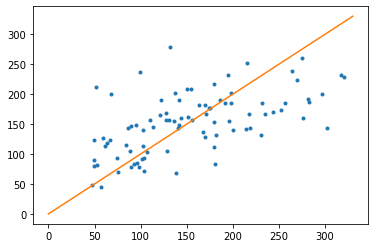

In [158]:
# plot prediction and actual data
y_pred_theil = model_theil.predict(X_test) 
plt.plot(y_test, y_pred_theil, '.')

# plot a line, a perfect prediction would all fall on this line
# np.linspace is a linear array of 100 values between 0 and 330
x = np.linspace(0, 330, 100) 
y = x
plt.plot(x, y)
plt.show()

We now extract some known [Linear Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) information.

In [159]:
# The coefficients
print("Coefficients: \n", model_theil.coef_)

# Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred_theil))

# The mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred_theil))

# Mean Absolute Percent Error
print("Mean Absolute Percent Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred_theil))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_theil))

Coefficients: 
 [  18.59510574 -265.06683712  564.85324951  250.94319822  120.13142816
 -362.69441613 -252.65080346  204.54109282  505.55635601   18.07825705]
Mean Absolute Error (MAE): 46.09
Mean Squared Error: 3528.65
Mean Absolute Percent Error: 0.37
Coefficient of determination: 0.31


## Compare Models

### Making a scatterplot of all the predicted values

Plot the original (y_test) versus all the other values predicted from the differnt models.

First want to make a dataframe with all of the datapoints. The data is currently saved as numpy arrays, so we first need to covert the arrays into a dataframe so we can later merge them. 

In [160]:
# convert arrays into their own dataframes
df_test = pd.DataFrame(y_test)
df_pred = pd.DataFrame(y_pred)
df_pred_ridge = pd.DataFrame(y_pred_ridge)
df_pred_ransac = pd.DataFrame(y_pred_ransac)
df_pred_theil = pd.DataFrame(y_pred_theil)

# rename column names
df_test.rename(columns={0 :'Original'}, inplace=True)
df_pred.rename(columns={0 :'Linear Regression'}, inplace=True)
df_pred_ridge.rename(columns={0 :'Ridge Regression'}, inplace=True)
df_pred_ransac.rename(columns={0 :'RANSAC Regression'}, inplace=True)
df_pred_theil.rename(columns={0 :'Theil-Sen Regression'}, inplace=True)


# check the outputs
print(df_test.head)
print(df_pred.head)
print(df_pred_ridge.head)
print(df_pred_ransac.head)
print(df_pred_theil.head)

<bound method NDFrame.head of     Original
0      321.0
1      215.0
2      127.0
3       64.0
4      175.0
..       ...
84     104.0
85      49.0
86     103.0
87     142.0
88      59.0

[89 rows x 1 columns]>
<bound method NDFrame.head of     Linear Regression
0          238.471452
1          248.931706
2          164.054042
3          120.307944
4          187.424221
..                ...
84          76.773777
85          94.940469
86         145.295505
87         194.037764
88         132.785343

[89 rows x 1 columns]>
<bound method NDFrame.head of     Ridge Regression
0         236.049690
1         255.809546
2         160.352068
3         122.670074
4         191.335137
..               ...
84         72.574747
85         96.171410
86        149.003149
87        190.432497
88        135.560419

[89 rows x 1 columns]>
<bound method NDFrame.head of     RANSAC Regression
0          217.021898
1          264.373293
2          143.499148
3          147.623896
4          160.278278
..  

In [161]:
# concat the dataframes
df = pd.concat([df_test, df_pred, df_pred_ridge, df_pred_ransac, df_pred_theil], axis = 1)
df.head

<bound method NDFrame.head of     Original  Linear Regression  Ridge Regression  RANSAC Regression  \
0      321.0         238.471452        236.049690         217.021898   
1      215.0         248.931706        255.809546         264.373293   
2      127.0         164.054042        160.352068         143.499148   
3       64.0         120.307944        122.670074         147.623896   
4      175.0         187.424221        191.335137         160.278278   
..       ...                ...               ...                ...   
84     104.0          76.773777         72.574747          82.604630   
85      49.0          94.940469         96.171410          81.107299   
86     103.0         145.295505        149.003149         167.334719   
87     142.0         194.037764        190.432497         209.675812   
88      59.0         132.785343        135.560419         144.331961   

    Theil-Sen Regression  
0             227.881859  
1             251.720076  
2             156.338628

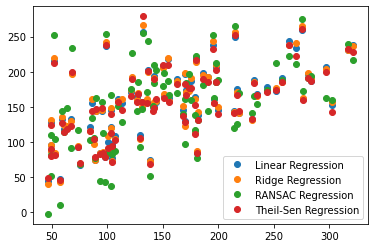

In [162]:
# multiple plots
plt.plot('Original', 'Linear Regression', data=df, linestyle='none', marker='o') # linear regression
plt.plot('Original', 'Ridge Regression', data=df, linestyle='none', marker='o') # ridge regression (HuberRegressor)
plt.plot('Original', 'RANSAC Regression', data=df, linestyle='none', marker='o') # ridge regression (HuberRegressor)
plt.plot('Original', 'Theil-Sen Regression', data=df, linestyle='none', marker='o') # ridge regression (HuberRegressor)


# show legend
plt.legend()

### Comparing Paramaters

In [186]:
# initialize data of lists.
# params = {'Model': ['Linear', 'Ridge', 'RANSAC', 'Theil-Sen'],
        # 'Mean Absolute Error': [(% mean_absolute_error(y_test, y_pred)), (% mean_absolute_error(y_test, y_pred_ridge)), (% mean_absolute_error(y_test, y_pred_ransac)), (% mean_absolute_error(y_test, y_pred_theil))],
        # 'Mean Squared Error': [(% mean_squared_error(y_test, y_pred)), (% mean_squared_error(y_test, y_pred_ridge)), (% mean_squared_error(y_test, y_pred_ransac)), (% mean_squared_error(y_test, y_pred_theil))]}
        #'Mean Absolute Percent Error': [(20), (21), (19), (18)],
        #'Coefficient of determination': [(20), (21), (19), (18)]}

params = {'Model': ['Linear', 'Ridge', 'RANSAC', 'Theil-Sen'],
        'Mean Absolute Error': [(mean_absolute_error(y_test, y_pred)), (mean_absolute_error(y_test, y_pred_ridge)), (mean_absolute_error(y_test, y_pred_ransac)), (mean_absolute_error(y_test, y_pred_theil))],
        'Mean Squared Error': [(mean_squared_error(y_test, y_pred)), (mean_squared_error(y_test, y_pred_ridge)), (mean_squared_error(y_test, y_pred_ransac)), (mean_squared_error(y_test, y_pred_theil))],
        'Mean Absolute Percent Error': [(mean_absolute_percentage_error(y_test, y_pred)), (mean_absolute_percentage_error(y_test, y_pred_ridge)), (mean_absolute_percentage_error(y_test, y_pred_ransac)), (mean_absolute_percentage_error(y_test, y_pred_theil))],
        'Coefficient of determination': [(r2_score(y_test, y_pred)), (r2_score(y_test, y_pred_ridge)), (r2_score(y_test, y_pred_ransac)), (r2_score(y_test, y_pred_theil))]}
  
# Create dataframe
df_params = pd.DataFrame(params)
df_params


,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percent Error,Coefficient of determination
0,Linear,46.094697,3528.653174,0.371409,0.311875
1,Ridge,46.954318,3519.042448,0.389569,0.313750
2,RANSAC,53.724575,4434.874407,0.448424,0.135153
3,Theil-Sen,46.094697,3528.653174,0.371409,0.311875


The models all look fairly comparable except for the RANSAC one which has a high mean absolute error, high mean absoloute percent error, and a low r-squared value. 